**This notebook is derived from the tutorial on [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) by [Rachael Tatman](https://www.kaggle.com/rtatman) at [kaggle](https://www.kaggle.com/)**

# Scaling And Normalization

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

#for Box-Cox Transformation
from scipy import stats

#for min-max scaling
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Scaling Vs. Normalization:
Both terms are pretty confusing mostly because they're used interchangeably very often. In both the cases we're transforming the values of numeric variables so that the transformed data point have specific helpful properties. The difference is : <br> 
* in **scaling**, we're changing the range of the data, while
* in **normalization**, we're changing the shape of the distribution of the data.

## Scaling
In this we're transforming the data so that it fits within a specific scale, like 0-100 or 0-1. Scaling is mostly done when we're using methods based on measures of how far apart the data points are, like Support Vector Machine (SVM) or K-Nearest Neighbors (KNN). In these algorithms a change of "1" in any numeric feature is given the same importance. <br>
For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

In [4]:
# generate 1000 data points ramdomly from en exponential distribution
data = np.random.exponential(size=1000)

# min_max scaling data between 0-1
scaled_data = minmax_scaling(data, columns=[0])

**Plotting both data to compare:**

Text(0.5, 1.0, 'Scaled Data')

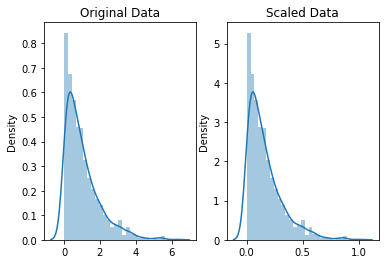

In [7]:
fig, ax = plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

We can notice that the range or original data is 0~8 is scaled down to 0-1, however the shape of the data is still the same.

## Normalization
The normalization is performed to change the observations so that they can be described as a normal distribution. <br>
**Normal Distribution:** Also known as *bell curve* or *Gaussian Distribution*. It is a distribution of bell    shape where roughly equal observations fall above and below the mean & the mean and median are the same. Is such distributions there are more data points closer to the mean.<br>
In general, normalization is performed if we're going to use the Machine Learning or Statistics technique that assume our data is normally distributed. For instance algorithms like Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. <br>
(Tip: Any method with "Gaussian" in the name probably assumes normality.)

In [8]:
normalised_data = stats.boxcox(data)

**Let's plot the above normalised data.**

Text(0.5, 1.0, 'Normalised Data')

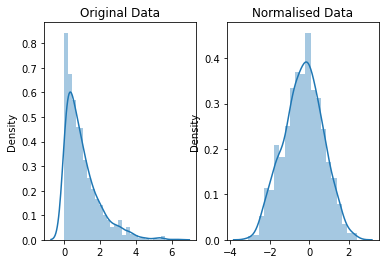

In [11]:
fig, ax = plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalised_data[0], ax=ax[1])
ax[1].set_title("Normalised Data")

Notice that the shape of our data is changed after normalisation, it is almost like a bell shape now.